# Kinematika togega telesa
Prof. dr. Janko Slavič, Univerza v Ljubljani, Fakulteta za strojništvo

## Vrtilna količina - vektorski izračun

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

Če uporabite Google Colab, potem odkomentirajte (odstranite #) spodnje vrstice in jih sprožite:

In [2]:
#def custom_latex_printer(exp,**options):
#    from google.colab.output._publish import javascript
#    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#    javascript(url=url)
#    return sym.printing.latex(exp,**options)
#sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Definirajmo simbole:

In [3]:
ωx, ωy, ωz, m = sym.symbols("omega_x, omega_y, omega_z m")
x = sym.Function('x')(m)
y = sym.Function('y')(m)
z = sym.Function('z')(m)

in vektorje:

In [4]:
r = sym.Matrix([[x], [y], [z]])
ω = sym.Matrix([[ωx], [ωy], [ωz]])

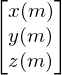

In [5]:
r

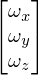

In [6]:
ω

Želimo izračunati:
$$\boldsymbol{L}=\int_m \boldsymbol{r}\times\boldsymbol{\omega}\times\boldsymbol{r}\,\,\textrm{d}m$$
Izračunajmo podintegralsko funkcijo

In [7]:
B = r.cross(ω.cross(r))

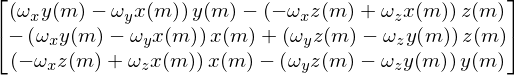

In [8]:
B

Ker je kotna hitrost $\boldsymbol{\omega}$ konstantna za vse masne delce, jo lahko izpostavimo. Poglejmo si najprej za prvo vrstico $B$:

In [9]:
B[0]

In [10]:
B[0].expand().coeff(ωx)

In [11]:
B[0].expand().coeff(ωy)

In [12]:
B[0].expand().coeff(ωz)

In sedaj posplošimo:

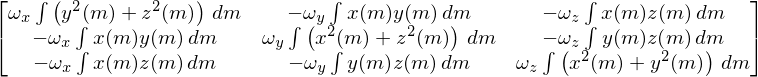

In [13]:
L = sym.Matrix([[w*sym.integrate(b.expand().coeff(w),m) for w in ω] for b in B])
L

Iz zapisa je jasno, da je smiselno zapisati masni vztrajnostni tenzor (pri togem telesu je konstanta) kot:

<img src='fig/masna matrika.png' width=350>

## Masni vztrajnostni moment trikotne plošče

(V mapi `\ostalo\` se nahaja SolidWorks datoteka obravnavane plošče; preverite MVM v modelu!)

<img src='fig/trikotnik.png' width=300>

Simboli

In [15]:
a, b, h, x, y, r, m = sym.symbols('\
a, b, h, x, y, rho, m')

Podatki

In [16]:
podatki = {a: 1, b:2, h: 0.01, r: 2700}

Funkcija stranice $y(x)$:

In [17]:
fx = a - a/b*y

Priprava numeričnih podatkov:

In [18]:
fxp = sym.lambdify(y, fx.subs(podatki), 'numpy')
y_n = np.linspace(0, podatki[b], 10)
x_n = fxp(y_n)
y_n = np.append(y_n, 0.) # zaradi prikaza dodamo 0 na koncu
x_n = np.append(x_n, 0.) # zaradi prikaza dodamo 0 na koncu

Prikažimo trikotnik

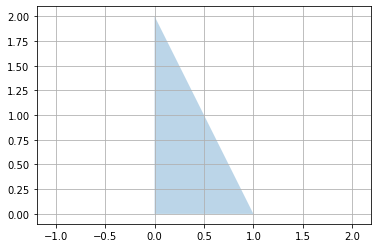

In [62]:
ax = plt.subplot(111)
plt.fill(x_n[::-1], y_n[::-1], alpha=0.3, closed=True)
ax.axis('equal')
plt.grid(True)
plt.xlim(-.1, podatki[a]+0.1)
plt.ylim(-.1, podatki[b]+0.1)
plt.show()

Masni vztrajnostni momenti (integriramo: $y^2 \, f(x)\,r\,\rho\,h$)

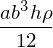

In [20]:
J_xx = sym.integrate(y**2 * fx * r * h, (y, 0, b))
J_xx

Vpeljemo maso $m$:

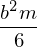

In [21]:
J_xx = J_xx.subs(h*r*a*b/2, m)
J_xx

Na podlagi rezultata $J_{xx}$, definiramo še $J_{yy}$ in nato $J_{zz}$:

In [22]:
J_yy = J_xx.subs(b,a)
J_zz = J_xx + J_yy

Izvedemo še integral za deviacijske MVM, najprej 
$J_{xy}=\int_0^{b}
\left(\int_0^{f(x)} x\,y\,h\,\rho\, \textrm{d}x\right)
\textrm{d}y$:

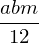

In [24]:
J_xy = sym.integrate( sym.integrate(x*y * h * r, (x, 0, fx)), (y, 0, b)).subs(h*r*a*b/2, m)
J_xy

Ker je telo simetrično glede na ravnini $xz$ in $yz$, sta naslednja MVM enaka nič:

In [25]:
J_xz = 0
J_yz = 0

Matrika MVM torej je:

In [26]:
J = sym.Matrix([[+J_xx, -J_xy, -J_xz],
                [-J_xy, +J_yy, -J_yz],
                [-J_xz, -J_yz, +J_zz]])

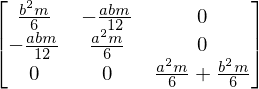

In [27]:
J

Numerične vrednosti:

In [64]:
Jnum = np.array(J.subs(m, h*r*a*b/2).evalf(subs=podatki), dtype=float)
Jnum

array([[18. , -4.5,  0. ],
       [-4.5,  4.5,  0. ],
       [ 0. ,  0. , 22.5]])

Sedaj lahko izračunamo glavne MVM:

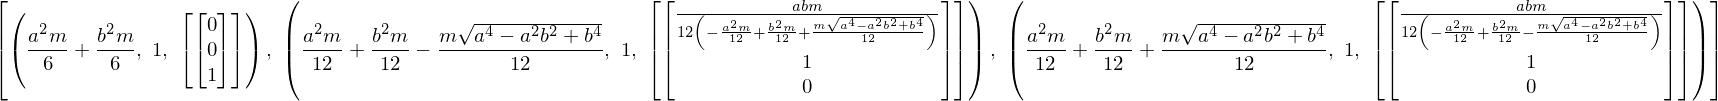

In [43]:
eig = J.eigenvects()
eig

Ali v numerični obliki:

In [53]:
eig = np.linalg.eig(Jnum)
eig

(array([19.36249037,  3.13750963, 22.5       ]),
 array([[ 0.95709203,  0.28978415,  0.        ],
        [-0.28978415,  0.95709203,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

Glavni MVM v numerični obliki so:

In [54]:
eig[0]

array([19.36249037,  3.13750963, 22.5       ])

In pripadajoči lastni vektorji (stolpci):

In [56]:
eig[1]

array([[ 0.95709203,  0.28978415,  0.        ],
       [-0.28978415,  0.95709203,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

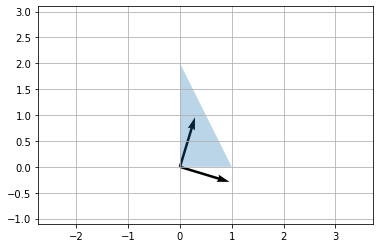

In [67]:
ax = plt.subplot(111)
plt.fill(x_n[::-1], y_n[::-1], alpha=0.3, closed=True)
ax.axis('equal')
plt.grid(True)
plt.xlim(-1.1, podatki[a]+1.1)
plt.ylim(-1.1, podatki[b]+1.1)
ax.quiver(0,0,eig[1][0,0], eig[1][1,0],angles='xy',scale_units='xy',scale=1)
ax.quiver(0,0,eig[1][0,1], eig[1][1,1],angles='xy',scale_units='xy',scale=1)
plt.show()

## Zvrnitev osi - izpeljava

Izpeljava zvrnitve osi; definirajmo najprej simbole:

In [69]:
Lx, Ly, Lz, x, y, z = sym.symbols("lambda_x, lambda_y, lambda_z, x, y, z")

Vektor lege $\mathbf{r}$ in vektor zvrnjene osi: $\mathbf{\lambda}$:

In [70]:
r = sym.Matrix([[x], [y], [z]])
L = sym.Matrix([[Lx], [Ly], [Lz]])

In [71]:
r

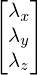

In [72]:
L

Podintegralska funkcija je:

In [73]:
tmp1 = r.cross(L).dot(r.cross(L))
tmp1

In [74]:
tmp2 = tmp1.expand()
tmp2

Opzimo, da konstantne člene $\lambda$ lahko izpostavimo in ostanejo členi, ki definirajo MVM:

In [43]:
tmp2.coeff(Lx**2)